In [25]:
import requests
import json

positive_keywords_groups = {
    "Genetic Factors": ["Chorionicity", "Twinning Genetics Consortium", "Zygosity", "SNP", "Gene Loci", "Genetic Predisposition"],
    "Hormonal Factors": ["Hormones", "FSH", "Luteinizing hormone", "FSH Levels", "hormonal regulation"],
    "Epidemiological Factors": ["Lifestyle", "Maternal Health", "demographic data"],
    "Twinning Analysis": ["Dizygotic Twinning", "Dizygotic Twins", "Pedigree analysis", "meta-analysis", "Fertility", "Dizygotic", "Twin Comparison"],
    "Reproductive Traits": ["Fertility", "Assisted Reproductive Technology", "Multiple Births", "IVF", "ART"],
    "Twinning Rates": ["Multiple Pregnancy", "Twinning", "Dizygotic Twinning", "Multiple Ovulation", "Double Ovulation", "Twinning Trends", "Geographical Variation", "Medical Interventions", "Ovulation Rates", "Multiple Pregnancy", "Twinning",
                       "Dizygotic Twinning", "Multiple Ovulation", "Double Ovulation"],
    "Animal Models": ["Sheep", "Cows", "Humans", "Embryonic Development", "Livestock", "Cattle"]
}

# Query ideas list
query_ideas = {
    "Human": ["Human Multiple Ovulation", "Human Double Ovulation", "Human Twinning"],
    "Sheep": ["Sheep Multiple Ovulation", "Sheep Double Ovulation", "Sheep Twinning"],
    "Cows": ["Cows Multiple Ovulation", "Cows Double Ovulation", "Cows Twinning"],
    "Cattle": ["Cattle Multiple Ovulation", "Cattle Double Ovulation", "Cattle Twinning"]
}

# Negative keywords list
negative_keywords = [
    "Disease", "Tumor", "Cancer", "Carcinoma", "Hepatitis", "Twin Studies",
    "Twin Model", "Heritability", "AE(C) Model", "The Classical Twin Method", "Digital Twin",
    "Monozygotic"
]

fields = "title,year,externalIds,abstract,url,authors,openAccessPdf"
api_key = "lrsIT7RZ3I8JUzCyzh6ay7U4cRh2GBau728MoMJv"

# Function to send requests and process responses
def send_request(query):
    url = f"http://api.semanticscholar.org/graph/v1/paper/search/bulk?query={query}&fields={fields}"
    headers = {
        'x-api-key': api_key
    }

    r = requests.get(url, headers=headers).json()
    print(f"Will retrieve an estimated {r.get('total', 0)} documents")

    # Save the papers
    retrieved = 0
    with open("papers.jsonl", "a") as file:
        while True:
            if "data" in r:
                retrieved += len(r['data'])
                print(f"Retrieved {retrieved} papers...")
                for paper in r['data']:
                    print(json.dumps(paper), file=file)
            if "next" not in r:
                break
            r = requests.get(f"{url}&cursor={r['next']}").json()

    print(f"Done! Retrieved {retrieved} papers total.")

# Loop through each group of positive keywords
for group_name, keywords in positive_keywords_groups.items():
    print(f"Processing group: {group_name}")

    for species, queries in query_ideas.items():
        # Combine each keyword with animal-specific query ideas
        query_components = keywords + queries
        query = f"({' | '.join(query_components)}) -({' -'.join(negative_keywords)})"

        # Send the request
        send_request(query)


Processing group: Genetic Factors
Will retrieve an estimated 15144 documents
Retrieved 1000 papers...
Done! Retrieved 1000 papers total.
Will retrieve an estimated 1802 documents
Retrieved 999 papers...
Done! Retrieved 999 papers total.
Will retrieve an estimated 1257 documents
Retrieved 1000 papers...
Done! Retrieved 1000 papers total.
Will retrieve an estimated 1252 documents
Retrieved 1000 papers...
Done! Retrieved 1000 papers total.
Processing group: Hormonal Factors
Will retrieve an estimated 15145 documents
Retrieved 1000 papers...
Done! Retrieved 1000 papers total.
Will retrieve an estimated 1803 documents
Retrieved 999 papers...
Done! Retrieved 999 papers total.
Will retrieve an estimated 1258 documents
Retrieved 1000 papers...
Done! Retrieved 1000 papers total.
Will retrieve an estimated 1253 documents
Retrieved 1000 papers...
Done! Retrieved 1000 papers total.
Processing group: Epidemiological Factors
Will retrieve an estimated 15144 documents
Retrieved 1000 papers...
Done! R

In [27]:
def check_for_duplicates(file_path):
    paper_count = {}
    duplicates = {}
    total_papers = 0  # Counter for total papers

    with open(file_path, 'r') as file:
        for line in file:
            total_papers += 1  # Increment the counter for each paper
            paper = json.loads(line)
            paper_id = paper.get('paperId')

            if paper_id in paper_count:
                paper_count[paper_id] += 1
                duplicates[paper_id] = paper_count[paper_id]
            else:
                paper_count[paper_id] = 1

    total_duplicates = sum(count - 1 for count in duplicates.values())  # Subtract 1 for each original
    return duplicates, total_duplicates, total_papers

# Example usage
duplicates, total_duplicates, total_papers = check_for_duplicates('papers.jsonl')
if duplicates:
    for paper_id, count in duplicates.items():
        print(f"Paper ID {paper_id} is duplicated {count} times.")
    print(f"Total duplicate entries: {total_duplicates}")
else:
    print("No duplicates found.")
print(f"Total entries in the file: {total_papers}")


Paper ID 00e91aa534a3c3aeeb5d19bea6c6ad2b9440222b is duplicated 14 times.
Paper ID 02f582b1ee5d46c5d155bbaeeb30d157295dad81 is duplicated 21 times.
Paper ID 043fd71f29d32ad416cd020ea3ef397ce549d8cd is duplicated 21 times.
Paper ID 04a3d5424731a825b091dca22ea926358f7aac19 is duplicated 14 times.
Paper ID 0589286028af93c478c3701e65626d9dd9b57037 is duplicated 14 times.
Paper ID 07a6f5b000d8e3fb7fe8f1d4e21ce1b4990b9d12 is duplicated 14 times.
Paper ID 081e45d5c13675b0f38244c3cdb1760813bdd737 is duplicated 14 times.
Paper ID 0ac28ec6e011ebb1672953fb5c7f7056abe69476 is duplicated 14 times.
Paper ID 0c549d1c1db265fb02230c1a2dc633613da72a0f is duplicated 14 times.
Paper ID 0cd760883620cb366ef8e33b1c2d0c05539da1e6 is duplicated 21 times.
Paper ID 0d12b2c022c35d5a3a3652a15c1d763ba96601d1 is duplicated 21 times.
Paper ID 0d7a9a777ed169686e77c97f835619b97d05b665 is duplicated 21 times.
Paper ID 0ece900dac8e68318f575bae161006b087ca8302 is duplicated 14 times.
Paper ID 0eea3b8c95ada2e430f06168401bf

In [29]:
def remove_duplicates(file_path):
    seen_papers = set()
    unique_entries = []

    # Read the file and filter duplicates
    with open(file_path, 'r') as file:
        for line in file:
            paper = json.loads(line)
            paper_id = paper.get('paperId')

            if paper_id not in seen_papers:
                unique_entries.append(paper)
                seen_papers.add(paper_id)

    # Overwrite the original file with unique entries
    with open(file_path, 'w') as file:
        for paper in unique_entries:
            json.dump(paper, file)
            file.write('\n')  # Add newline to separate JSON entries

    return len(unique_entries)

# Example usage
file_path = 'papers.jsonl'
unique_entry_count = remove_duplicates(file_path)
print(f"Total unique entries written to {file_path}: {unique_entry_count}")

Total unique entries written to papers.jsonl: 3557


In [2]:
import requests
import json
from collections import Counter

fields = 'title,paperId'
timeout_seconds = 7

def fetch_references(paper_id):
    url = f'https://api.semanticscholar.org/graph/v1/paper/{paper_id}/references?fields={fields}&limit=1000'
    headers = {'x-api-key': api_key}
    try:
        response = requests.get(url, headers=headers, timeout=timeout_seconds)
        if response.status_code == 200:
            return response.json().get('data', [])
        else:
            print(f"Failed to fetch references for paper ID {paper_id}")
            return []
    except requests.Timeout:
        print(f"Request timed out for paper ID {paper_id}")
        return []

def save_progress(last_processed_id, file_path):
    with open(file_path, 'w') as file:
        file.write(last_processed_id)

def get_last_processed_id(file_path):
    try:
        with open(file_path, 'r') as file:
            return file.read().strip()
    except FileNotFoundError:
        return None

def process_dataset(file_path, output_file_path, progress_file_path):
    reference_count = Counter()
    paper_processed = 0
    last_processed_id = get_last_processed_id(progress_file_path)

    with open(file_path, 'r') as file:
        papers = file.readlines()

    total_papers = len(papers)
    start_processing = False if last_processed_id else True

    for line in papers:
        paper = json.loads(line)
        paper_id = paper.get('paperId')

        if not start_processing:
            if paper_id == last_processed_id:
                start_processing = True
            continue

        references = fetch_references(paper_id)
        for ref in references:
            reference_id = ref.get('citedPaper', {}).get('paperId')
            if reference_id:
                reference_count[reference_id] += 1

            print(f"Processed {paper_processed}/{total_papers} papers...")
            save_progress(paper_id, progress_file_path)

    # Write frequently cited papers to new file
    with open(output_file_path, 'w') as output_file:
        for paper_id, count in reference_count.items():
            if count > 3:  # Change this threshold as needed
                output_file.write(json.dumps({'paperId': paper_id, 'citationCount': count}) + '\n')

    return len(reference_count)

# Example usage
input_file = 'papers.jsonl'
output_file = 'frequently_cited_papers.jsonl'
progress_file = 'progress.txt'
total_references = process_dataset(input_file, output_file, progress_file)
print(f"Total unique references processed: {total_references}")


Processed 1/3557 papers...
Processed 2/3557 papers...
Processed 3/3557 papers...
Processed 4/3557 papers...
Processed 5/3557 papers...
Processed 6/3557 papers...
Processed 7/3557 papers...
Processed 8/3557 papers...
Processed 9/3557 papers...
Processed 10/3557 papers...
Processed 11/3557 papers...
Processed 12/3557 papers...
Processed 13/3557 papers...
Processed 14/3557 papers...
Processed 15/3557 papers...
Processed 16/3557 papers...
Processed 17/3557 papers...
Processed 18/3557 papers...
Processed 19/3557 papers...
Processed 20/3557 papers...
Processed 21/3557 papers...
Processed 22/3557 papers...
Processed 23/3557 papers...
Processed 24/3557 papers...
Processed 25/3557 papers...
Processed 26/3557 papers...
Processed 27/3557 papers...
Processed 28/3557 papers...
Processed 29/3557 papers...
Processed 30/3557 papers...
Processed 31/3557 papers...
Processed 32/3557 papers...
Processed 33/3557 papers...
Processed 34/3557 papers...
Processed 35/3557 papers...
Processed 36/3557 papers...
P

In [6]:
import json

def read_jsonl_to_dict(file_path):
    with open(file_path, 'r') as file:
        return {json.loads(line)['paperId']: json.loads(line) for line in file}

def write_extended_jsonl(input_file_path, output_file_path, existing_papers_dict):
    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
        for line in input_file:
            paper = json.loads(line)
            paper['in_existing_dataset'] = paper['paperId'] in existing_papers_dict
            json.dump(paper, output_file)
            output_file.write('\n')

existing_papers = read_jsonl_to_dict('papers.jsonl')
write_extended_jsonl('frequently_cited_papers.jsonl', 'extended_frequently_cited_papers.jsonl', existing_papers)


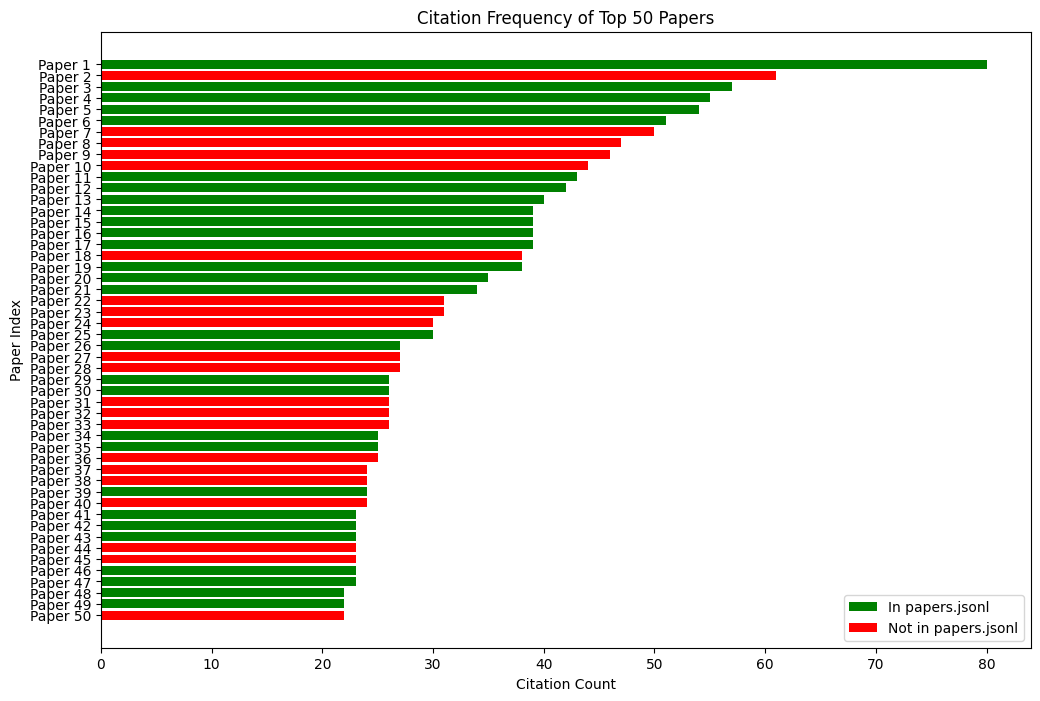

In [8]:
import matplotlib.pyplot as plt

def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        return [json.loads(line) for line in file]

# Read the extended frequently cited papers
extended_cited_papers = read_jsonl('extended_frequently_cited_papers.jsonl')

# Sort the papers by their citation count and select the top N
top_n = 50
sorted_cited_papers = sorted(extended_cited_papers, key=lambda x: x['citationCount'], reverse=True)[:top_n]

# Prepare data for plotting
indices = range(len(sorted_cited_papers))
citation_counts = [paper['citationCount'] for paper in sorted_cited_papers]
colors = ['green' if paper['in_existing_dataset'] else 'red' for paper in sorted_cited_papers]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(indices, citation_counts, color=colors)
plt.xlabel('Citation Count')
plt.ylabel('Paper Index')
plt.title('Citation Frequency of Top 50 Papers')
plt.yticks(indices, [f'Paper {i+1}' for i in indices])
plt.gca().invert_yaxis()
plt.legend([bars[colors.index('green')], bars[colors.index('red')]], ['In papers.jsonl', 'Not in papers.jsonl'])

plt.show()


Pearson's correlation coefficient: 0.3011757338071646


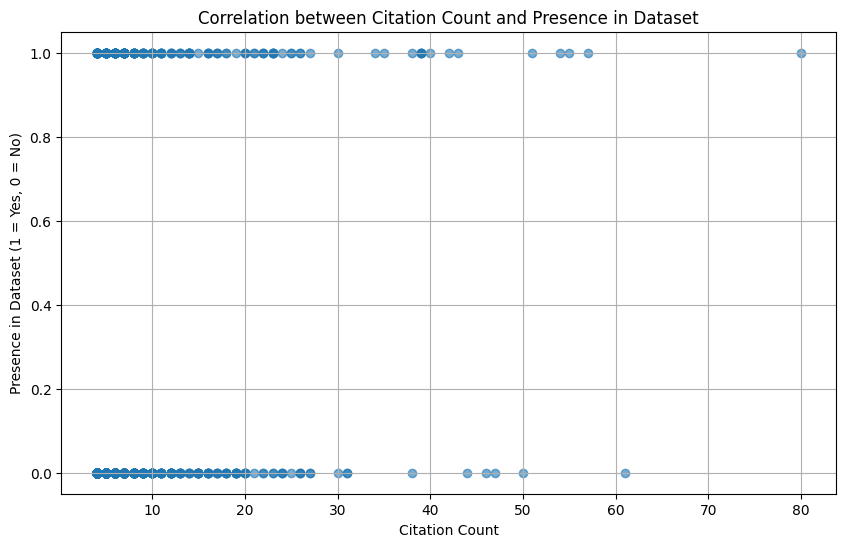

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        return [json.loads(line) for line in file]

# Read the extended frequently cited papers
extended_cited_papers = read_jsonl('extended_frequently_cited_papers.jsonl')

# Extract citation counts and presence in dataset
citation_counts = [paper['citationCount'] for paper in extended_cited_papers]
in_dataset = [1 if paper['in_existing_dataset'] else 0 for paper in extended_cited_papers]

# Calculate Pearson's correlation
correlation, _ = pearsonr(citation_counts, in_dataset)
print(f"Pearson's correlation coefficient: {correlation}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(citation_counts, in_dataset, alpha=0.6)
plt.xlabel('Citation Count')
plt.ylabel('Presence in Dataset (1 = Yes, 0 = No)')
plt.title('Correlation between Citation Count and Presence in Dataset')
plt.grid(True)
plt.show()


In [14]:
import requests
import json

api_key = 'lrsIT7RZ3I8JUzCyzh6ay7U4cRh2GBau728MoMJv'
fields = "title,year,externalIds,abstract,url,authors,openAccessPdf"

def fetch_paper_details(paper_id):
    print(f"Fetching details for paper ID: {paper_id}...")
    url = f"https://api.semanticscholar.org/graph/v1/paper/{paper_id}?fields={fields}"
    headers = {'x-api-key': api_key}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        print(f"Successfully fetched details for paper ID: {paper_id}")
        return response.json()
    else:
        print(f"Failed to fetch details for paper ID {paper_id} (Status Code: {response.status_code})")
        return None

def retrieve_papers(input_file_path, output_file_path):
    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
        for line in input_file:
            paper = json.loads(line)
            if not paper['in_existing_dataset']:
                paper_id = paper['paperId']
                paper_details = fetch_paper_details(paper_id)
                if paper_details:
                    json.dump(paper_details, output_file)
                    output_file.write('\n')

# Example usage
print("Starting to retrieve papers...")
retrieve_papers('extended_frequently_cited_papers.jsonl', 'papers_extended.jsonl')
print("Finished retrieving papers.")


Starting to retrieve papers...
Fetching details for paper ID: 2d866038fb1a40f6a2897fe7a84dc8811fef7b64...
Successfully fetched details for paper ID: 2d866038fb1a40f6a2897fe7a84dc8811fef7b64
Fetching details for paper ID: e71976c61af4f0fa2e69c36ab74dfa04f0705c6c...
Successfully fetched details for paper ID: e71976c61af4f0fa2e69c36ab74dfa04f0705c6c
Fetching details for paper ID: 8d8b5e4d2c63463d153bf21a2a4a9b68a0153699...
Successfully fetched details for paper ID: 8d8b5e4d2c63463d153bf21a2a4a9b68a0153699
Fetching details for paper ID: a023e473a58d5a2af155fa8e7ff854e3692f861c...
Successfully fetched details for paper ID: a023e473a58d5a2af155fa8e7ff854e3692f861c
Fetching details for paper ID: 8e95231c5cfdd1699b98445d0f56e887eed8b5bb...
Successfully fetched details for paper ID: 8e95231c5cfdd1699b98445d0f56e887eed8b5bb
Fetching details for paper ID: 8710c0118a1dbd7c2d89af66095a46d11b1e3f66...
Successfully fetched details for paper ID: 8710c0118a1dbd7c2d89af66095a46d11b1e3f66
Fetching detail